___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Pandas Lesson, Session - 4</p><h1>
    

# Data Frames

 - ### ``DataFrames`` are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

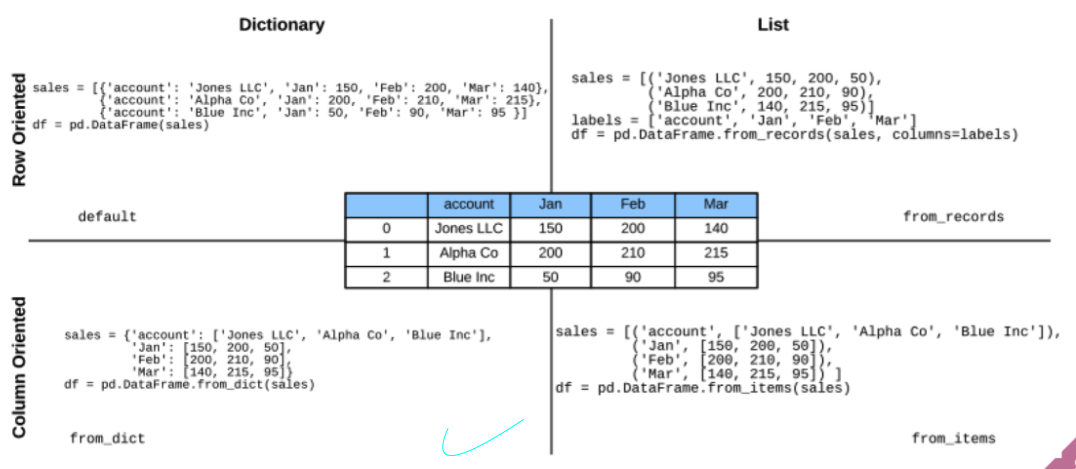

In [1]:
import numpy as np 
import pandas as pd

 ## Creating a DataFrame using the ``list``s of data and columns

pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

Two-dimensional, size-mutable, potentially heterogeneous tabular data.

In [2]:
data = [1,3,5,7,9,19]

In [3]:
pd.DataFrame(data=data, columns=["col_1"])

,col_1
0,1
1,3
2,5
3,7
4,9
5,19


In [4]:
pd.Series(data=data)

0     1
1     3
2     5
3     7
4     9
5    19
dtype: int64

In [4]:
pd.DataFrame(data=data, columns=["col_1"])

,col_1
0,1
1,3
2,5
3,7
4,9
5,19


 ## Creating a DataFrame using a ``NumPy Arrays``

In [7]:
m = np.arange(1,24,2).reshape(3,4) #1den 24e 2ser gidecek,,3e 4luk array
m

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

In [8]:
df=pd.DataFrame(data=m, columns=['var1',"var2",'var3','var4']) #genelde df ismi verilir 
df

,var1,var2,var3,var4
0,1,3,5,7
1,9,11,13,15
2,17,19,21,23


In [14]:
df.sample(2)

,var1,var2,var3,var4
2,17,19,21,23
0,1,3,5,7


In [9]:
df.columns

Index(['var1', 'var2', 'var3', 'var4'], dtype='object')

In [9]:
for i in df.columns:
    print(i)

var1
var2
var3
var4


In [10]:
for i in df.columns: 
    print(df[i].sum()) #her bir sutun icin toplamlari yazdi
    

27
33
39
45


In [10]:
for i in df: 
    empty=df[i].isnull().sum()
    percent_value=df[i].isnull().sum() * 100 / len(df)
    
    print("Column '{}' has {} null value, which is {}% of the column.".format(i, empty, round(percent_value,3)))

Column 'var1' has 0 null value, which is 0.0% of the column.
Column 'var2' has 0 null value, which is 0.0% of the column.
Column 'var3' has 0 null value, which is 0.0% of the column.
Column 'var4' has 0 null value, which is 0.0% of the column.


In [12]:
df.columns=["new1","new2","new3","new4"] #sutun sayisi ne kadarsa o kadar yazilmasi lazim 
df

,new1,new2,new3,new4
0,1,3,5,7
1,9,11,13,15
2,17,19,21,23


In [11]:
df.index=["a","b","c"]  #rowlara isim verdik
df

,var1,var2,var3,var4
a,1,3,5,7
b,9,11,13,15
c,17,19,21,23


In [20]:
df.rename(columns={"new1":"a", "new2":"b"}) #kalici yapmaz 
# df.rename(columns = {"new1":"a", "new2":"b"}, inplace=True) # kalici yapar

,a,b,new3,new4
a,1,3,5,7
b,9,11,13,15
c,17,19,21,23


In [21]:
df.shape

(3, 4)

In [22]:
df.shape[1] #sutun sayisi

4

In [23]:
df.ndim #boyt

2

In [24]:
df.size #icerdeki eleman sayisi

12

In [25]:
len(df) #row sayisi

3

In [14]:
df.values #data set bilgisi verir

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

In [27]:
type(df)

pandas.core.frame.DataFrame

In [12]:
type(df.values)

numpy.ndarray

 ## Creating a DataFrame using a ``dict``

In [13]:
s1 = np.random.randint(2,10, size = 4)
s2 = np.random.randint(3,10, size = 4)
s3 = np.random.randint(4,15, size = 4)

In [16]:
s1


array([5, 7, 2, 4])

In [31]:
s2


array([8, 3, 3, 9])

In [32]:
s3

array([ 8,  5,  5, 13])

In [14]:
my_dict = {"var1":s1, "var2":s2, "var3":s3} #var'lar sutun adi, her sutuna array atandi
my_dict

{'var1': array([6, 3, 9, 8]),
 'var2': array([8, 8, 7, 9]),
 'var3': array([13, 10,  5,  5])}

In [16]:
df1=pd.DataFrame(my_dict)
df1


,var1,var2,var3
0,6,8,13
1,3,8,10
2,9,7,5
3,8,9,5


In [17]:
df.index

Index(['a', 'b', 'c'], dtype='object')

In [36]:
[i for i in df.index] #indexlerin/sutunlarin icinde dolasmayi saglar

['a', 'b', 'c']

In [18]:
"var2" in df1

True

### Now, let's examine again the ***idexing, selection*** and ***slicing*** methods and several ***attributes*** using a different DataFrame

In [19]:
from numpy.random import randn #bundan sonra np.random yazmaya gerek kalmadi 

In [20]:
randn(5,4) #import ile getirdigimiz icin basina np.random yazmadan yapabildik

array([[-0.06382091,  0.94434554,  0.0172237 , -0.69281486],
       [ 2.29861942, -0.4994853 ,  0.30924159,  0.42181772],
       [-0.06834131,  1.05960175,  1.21919402,  0.5747115 ],
       [ 0.32600149,  0.56506417,  0.74133407,  1.20808721],
       [-0.60544229,  0.21038253,  1.2015028 , -1.45870324]])

In [21]:
np.random.seed(101) #seed ile hepimizde ayni random sayilar geldi
df3 = pd.DataFrame(randn(5,4), index = 'A B C D E'.split(), columns = 'W X Y Z'.split())
df3

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [30]:
df3["W"]  #W sutununu seri olarak getirdi 

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [42]:
type(df3["W"])

pandas.core.series.Series

In [23]:
df3[["W"]] #koseli parantez ile cagirinca DataFrame gelir

,W
A,2.706850
B,0.651118
C,-2.018168
D,0.188695
E,0.190794


In [29]:
df3.W #sutun icinde kalici degisiklik yapmaz

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

#### DataFrame Columns are just Series

In [46]:
df3["W":"Y"] #boyle bir islem yok

,W,X,Y,Z


In [47]:
df3["A":"C"] #sutun cagirmak icin bu yontem kullanilmali

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001


In [28]:
df3["A":"C"]["W"] #ilgili sutunu cagirmak icin 

A    2.706850
B    0.651118
C   -2.018168
Name: W, dtype: float64

In [49]:
df3["A":"C"][["W","Y"] ] #birden fazla sutun icin koseli parantez icine liste olarak yazmaliyiz

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077
C,-2.018168,0.528813


**Creating a new column:**

In [27]:
df3["new"]=df3["X"]*df3["Y"]
df3

,W,X,Y,Z,new2,new
A,2.706850,0.628133,0.907969,0.503826,1,0.570325
B,0.651118,-0.319318,-0.848077,0.605965,2,0.270806
C,-2.018168,0.740122,0.528813,-0.589001,3,0.391387
D,0.188695,-0.758872,-0.933237,0.955057,4,0.708208
E,0.190794,1.978757,2.605967,0.683509,5,5.156577


In [25]:
df3["new2"]=[1,2,3,4,5]
df3

,W,X,Y,Z,new2
A,2.706850,0.628133,0.907969,0.503826,1
B,0.651118,-0.319318,-0.848077,0.605965,2
C,-2.018168,0.740122,0.528813,-0.589001,3
D,0.188695,-0.758872,-0.933237,0.955057,4
E,0.190794,1.978757,2.605967,0.683509,5


In [31]:
df3.columns=['new','new2',"W","X","Y","Z"] #sutun insert etmedi, sutun adlari degisti
df3

,new,new2,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826,1,0.570325
B,0.651118,-0.319318,-0.848077,0.605965,2,0.270806
C,-2.018168,0.740122,0.528813,-0.589001,3,0.391387
D,0.188695,-0.758872,-0.933237,0.955057,4,0.708208
E,0.190794,1.978757,2.605967,0.683509,5,5.156577


In [53]:
df3=df3[['new','new2',"W","X","Y","Z"] ]
df3

,new,new2,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826,0.570325,1
B,0.651118,-0.319318,-0.848077,0.605965,0.270806,2
C,-2.018168,0.740122,0.528813,-0.589001,0.391387,3
D,0.188695,-0.758872,-0.933237,0.955057,0.708208,4
E,0.190794,1.978757,2.605967,0.683509,5.156577,5


## [Removing Columns & Rows](http://localhost:8888/notebooks/pythonic/DAwPythonSessions/w3resource-pandas-dataframe-drop.ipynb)

 ### Removing Columns

In [54]:
df3.drop("new2",axis=1) #kalici olmasi icin inplace eklemek gerekir ya da esitlemek

,new,W,X,Y,Z
A,2.706850,0.907969,0.503826,0.570325,1
B,0.651118,-0.848077,0.605965,0.270806,2
C,-2.018168,0.528813,-0.589001,0.391387,3
D,0.188695,-0.933237,0.955057,0.708208,4
E,0.190794,2.605967,0.683509,5.156577,5


In [55]:
df3.drop(["new","new2"],axis=1)

,W,X,Y,Z
A,0.907969,0.503826,0.570325,1
B,-0.848077,0.605965,0.270806,2
C,0.528813,-0.589001,0.391387,3
D,-0.933237,0.955057,0.708208,4
E,2.605967,0.683509,5.156577,5


In [ ]:
df3 #drop islemi kalici olmadigi icin tum tablo geldi 

In [ ]:
df3.drop(["new","new2"],axis=1, inplace=True)
df3

 ### Removing rows

In [ ]:
df3.drop("C",axis=0) #axis 1 sutun arar, axis 0 rowda arar


In [ ]:
df3.drop(index=["B"])

In [ ]:
df4=df3.drop("C",axis=0)
df4

In [ ]:
df3

## Selecting Rows

### First, let's take a quick look at [`.loc[]`](http://localhost:8888/notebooks/pythonic/DAwPythonSessions/w3resource-pandas-dataframe-loc.ipynb) | [`.iloc[]`](http://localhost:8888/notebooks/pythonic/DAwPythonSessions/w3resource-pandas-dataframe-iloc.ipynb)

#### `.loc[]` → allows us to select data using **labels** (names) of rows (index) & columns

#### `.iloc[]` → allows us to select data using **index numbers** of rows (index) & columns. it's like classical indexing logic

In [56]:
m = np.random.randint(1,40, size=(8,4)) 
df4 = pd.DataFrame(m, columns = ["var1","var2","var3",'var4'])
df4

,var1,var2,var3,var4
0,8,11,39,10
1,19,8,16,1
2,13,18,12,16
3,34,30,25,37
4,20,36,31,11
5,21,28,9,23
6,27,24,38,23
7,10,3,19,29


In [57]:
df4.loc[4]

var1    20
var2    36
var3    31
var4    11
Name: 4, dtype: int64

In [58]:
df4.loc[[4]]

,var1,var2,var3,var4
4,20,36,31,11


In [59]:
df4.loc[2:5] #2 ve 5 dahil. loc yazana gore yapar

,var1,var2,var3,var4
2,13,18,12,16
3,34,30,25,37
4,20,36,31,11
5,21,28,9,23


In [60]:
df4.iloc[2:5]#5 dahil degil indexe gore yapar

,var1,var2,var3,var4
2,13,18,12,16
3,34,30,25,37
4,20,36,31,11


In [61]:
df4.index='a b c d e f g h'.split()
df4

,var1,var2,var3,var4
a,8,11,39,10
b,19,8,16,1
c,13,18,12,16
d,34,30,25,37
e,20,36,31,11
f,21,28,9,23
g,27,24,38,23
h,10,3,19,29


In [62]:
df4.iloc[1:4] #index aldi, 

,var1,var2,var3,var4
b,19,8,16,1
c,13,18,12,16
d,34,30,25,37


In [63]:
# df4.loc[1:4] #loc indexte yazana bakar, 1 ve 4 rakamlari olmadigi icin yapamadi 
# hata verir 

In [ ]:
df4

In [ ]:
df4.iloc[3,1]


In [ ]:
df4.loc["d",'var2']

In [ ]:
df4.loc["d":"g"][["var3"]] #dataframe gostermek icin cift kose parantez

In [ ]:
df4.loc["d":"g",["var3"]]

In [ ]:
df4.iloc[2:5,2]

In [ ]:
df4.iloc[2:5][["var2"]] #dataframe olusturup sutun cagiriosun

#### Let's continue to examine `.loc[]` and `.iloc[]` using ``df3`` again

### Selecting subset of rows and columns

 - ### `.loc[[row labels|names], [column labels|names]]`

 - ### `.iloc[[row index numbers], [column index numbers]]`

### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [110]:
df3

,new,new2,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826,0.570325,1
B,0.651118,-0.319318,-0.848077,0.605965,0.270806,2
C,-2.018168,0.740122,0.528813,-0.589001,0.391387,3
D,0.188695,-0.758872,-0.933237,0.955057,0.708208,4
E,0.190794,1.978757,2.605967,0.683509,5.156577,5


In [108]:
df3>2

,new,new2,W,X,Y,Z
A,True,False,False,False,False,False
B,False,False,False,False,False,False
C,False,False,False,False,False,True
D,False,False,False,False,False,True
E,False,False,True,False,True,True


In [107]:
df3[df3>2]

,new,new2,W,X,Y,Z
A,2.70685,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,3.0
D,NaN,NaN,NaN,NaN,NaN,4.0
E,NaN,NaN,2.605967,NaN,5.156577,5.0


In [106]:
df3.iloc[[0,2],[0,3]]

,new,X
A,2.706850,0.503826
C,-2.018168,-0.589001


In [105]:
df3.iloc[0:2,0:3] #aralik 

,new,new2,W
A,2.706850,0.628133,0.907969
B,0.651118,-0.319318,-0.848077


In [104]:
df3[df3["Z"]>0.5]

,new,new2,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826,0.570325,1
B,0.651118,-0.319318,-0.848077,0.605965,0.270806,2
C,-2.018168,0.740122,0.528813,-0.589001,0.391387,3
D,0.188695,-0.758872,-0.933237,0.955057,0.708208,4
E,0.190794,1.978757,2.605967,0.683509,5.156577,5


In [103]:
df3[df3["Z"]>0.5]["X"]

A    0.503826
B    0.605965
C   -0.589001
D    0.955057
E    0.683509
Name: X, dtype: float64

In [102]:
df3[df3["Z"]>0.5][["X"]]

,X
A,0.503826
B,0.605965
C,-0.589001
D,0.955057
E,0.683509


#### For two conditions you can use **|** → `or`,  **&** →  `and` with parenthesis:

In [22]:
np.random.seed(101) #seed ile hepimizde ayni random sayilar geldi
df3 = pd.DataFrame(randn(5,4), index = 'A B C D E'.split(), columns = 'W X Y Z'.split())
df3

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [23]:
df3[(df3['W']>0) & (df3['Y']<1)] #hata verdiginde loc veya iloc ile yapmamiz gerekebilir

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057


In [118]:
df3[(df3['W']>0) & (df3['Y']<1)]=0
df3

,W,X,Y,Z
A,0.000000,0.000000,0.000000,0.000000
B,0.000000,0.000000,0.000000,0.000000
C,-2.018168,0.740122,0.528813,-0.589001
D,0.000000,0.000000,0.000000,0.000000
E,0.190794,1.978757,2.605967,0.683509


In [117]:
np.random.seed(101) #seed ile hepimizde ayni random sayilar geldi
df3 = pd.DataFrame(randn(5,4), index = 'A B C D E'.split(), columns = 'W X Y Z'.split())
df3

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [24]:
df3.loc[(df3.X>0),["X","Y"]]

,X,Y
A,0.628133,0.907969
C,0.740122,0.528813
E,1.978757,2.605967


In [116]:
df3.loc[((df3.W>1) | (df3.Y<1)), ['Y','Z']]

,Y,Z
A,0.907969,0.503826
B,-0.848077,0.605965
C,0.528813,-0.589001
D,-0.933237,0.955057


### Conditional selection using ``.loc[]`` and ``.iloc[]``

In [119]:
df3

,W,X,Y,Z
A,0.000000,0.000000,0.000000,0.000000
B,0.000000,0.000000,0.000000,0.000000
C,-2.018168,0.740122,0.528813,-0.589001
D,0.000000,0.000000,0.000000,0.000000
E,0.190794,1.978757,2.605967,0.683509


In [120]:
df3.reset_index() # indexi sifirlari eski indexi DataFrame icine katti

,index,W,X,Y,Z
0,A,0.000000,0.000000,0.000000,0.000000
1,B,0.000000,0.000000,0.000000,0.000000
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.000000,0.000000,0.000000,0.000000
4,E,0.190794,1.978757,2.605967,0.683509


In [121]:
df3.reset_index(drop=True) #kalici degil, eski indexi atti 

,W,X,Y,Z
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,-2.018168,0.740122,0.528813,-0.589001
3,0.000000,0.000000,0.000000,0.000000
4,0.190794,1.978757,2.605967,0.683509


In [122]:
df3.set_index("Z") #kalici olmaz 

,W,X,Y
Z,,,
0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,0.000000,0.000000
-0.589001,-2.018168,0.740122,0.528813
0.000000,0.000000,0.000000,0.000000
0.683509,0.190794,1.978757,2.605967


In [123]:
df3.reset_index(drop=True, inplace=True) #degisiklik kalici oldu, Z artik sutun ismi degil
df3

,W,X,Y,Z
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,-2.018168,0.740122,0.528813,-0.589001
3,0.000000,0.000000,0.000000,0.000000
4,0.190794,1.978757,2.605967,0.683509


## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

## Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [124]:
# Index Levels
outside = ['M1', 'M1', 'M1', 'M2', 'M2', 'M2','M3', 'M3', 'M3']
inside = [1, 2, 3, 1, 2, 3, 5, 6, 7]
multi_index = list(zip(outside, inside))
multi_index

[('M1', 1),
 ('M1', 2),
 ('M1', 3),
 ('M2', 1),
 ('M2', 2),
 ('M2', 3),
 ('M3', 5),
 ('M3', 6),
 ('M3', 7)]

In [125]:
hier_index=pd.MultiIndex.from_tuples(multi_index)

In [126]:
df=pd.DataFrame(np.random.randn(9,4), index = hier_index, columns=['A','B','C','D'])
df

A         B         C         D
M1 1  0.302665  1.693723 -1.706086 -1.159119
   2 -0.134841  0.390528  0.166905  0.184502
   3  0.807706  0.072960  0.638787  0.329646
M2 1 -0.497104 -0.754070 -0.943406  0.484752
   2 -0.116773  1.901755  0.238127  1.996652
   3 -0.993263  0.196800 -1.136645  0.000366
M3 5  1.025984 -0.156598 -0.031579  0.649826
   6  2.154846 -0.610259 -0.755325 -0.346419
   7  0.147027 -0.479448  0.558769  1.024810

In [67]:
df.loc['M1']

,A,B,C,D
1,0.903319,1.543568,3.014676,-0.139170
2,0.482311,0.977939,-0.344431,-1.785068
3,0.530949,0.628364,2.283261,0.148912


In [68]:
df.loc['M1'].loc[2]

A    0.482311
B    0.977939
C   -0.344431
D   -1.785068
Name: 2, dtype: float64

In [69]:
df.loc['M1'].loc[[2]] #dataframe icinde gormek icin 2.koseli parantez icine aldik

,A,B,C,D
2,0.482311,0.977939,-0.344431,-1.785068


In [70]:
df.index

MultiIndex([('M1', 1),
            ('M1', 2),
            ('M1', 3),
            ('M2', 1),
            ('M2', 2),
            ('M2', 3),
            ('M3', 5),
            ('M3', 6),
            ('M3', 7)],
           )

In [71]:
df.index.names

FrozenList([None, None])

In [72]:
df.index.names=["Group","Num"]
df


A         B         C         D
Group Num                                        
M1    1    0.903319  1.543568  3.014676 -0.139170
      2    0.482311  0.977939 -0.344431 -1.785068
      3    0.530949  0.628364  2.283261  0.148912
M2    1    0.536175  0.144883 -0.627879  1.151898
      2    0.259370 -1.186527 -0.673861 -1.555119
      3   -0.566604 -0.790608  0.230762  1.028012
M3    5   -0.888242 -2.141687 -0.976076  1.414672
      6   -1.562469 -0.676467 -1.617897 -1.818591
      7    0.171447  0.377750  1.049934 -0.526008

### let's take a quick look at the [``.xs()``](http://localhost:8888/notebooks/pythonic/DAwPythonSessions/w3resource-pandas-dataframe-xs.ipynb)

In [73]:
#loc ile yapinca deger atayabiliyoruz, .xs() ile yapinca atama yapamayiz
df.xs("M1")

,A,B,C,D
Num,,,,
1,0.903319,1.543568,3.014676,-0.139170
2,0.482311,0.977939,-0.344431,-1.785068
3,0.530949,0.628364,2.283261,0.148912


In [74]:
df.loc["M1"]

,A,B,C,D
Num,,,,
1,0.903319,1.543568,3.014676,-0.139170
2,0.482311,0.977939,-0.344431,-1.785068
3,0.530949,0.628364,2.283261,0.148912


In [75]:
df.xs(("M1",2)) #seri olarak verdi

A    0.482311
B    0.977939
C   -0.344431
D   -1.785068
Name: (M1, 2), dtype: float64

In [76]:
df.xs(("M1",2))

A    0.482311
B    0.977939
C   -0.344431
D   -1.785068
Name: (M1, 2), dtype: float64

In [77]:
df.xs(("M1",2),level=[0,1]) #dataframe olarak sonucu verdi

,,A,B,C,D
Group,Num,,,,
M1,2,0.482311,0.977939,-0.344431,-1.785068


In [78]:
df.xs(("M1",2),level=["Group","Num"]) #nerede aranmasi gerektigini levelde yaziyoruz

,,A,B,C,D
Group,Num,,,,
M1,2,0.482311,0.977939,-0.344431,-1.785068


In [79]:
# df.loc[2] -- hata verir 
# df.xs(2)  -- hata verir. bastakini verir ama 2.yi vermez 
df.xs(2, level="Num")  #tum 2leri getirdi 

,A,B,C,D
Group,,,,
M1,0.482311,0.977939,-0.344431,-1.785068
M2,0.259370,-1.186527,-0.673861,-1.555119


In [80]:
df["C"]

Group  Num
M1     1      3.014676
       2     -0.344431
       3      2.283261
M2     1     -0.627879
       2     -0.673861
       3      0.230762
M3     5     -0.976076
       6     -1.617897
       7      1.049934
Name: C, dtype: float64

In [81]:
df.xs("C", axis=1)

Group  Num
M1     1      3.014676
       2     -0.344431
       3      2.283261
M2     1     -0.627879
       2     -0.673861
       3      0.230762
M3     5     -0.976076
       6     -1.617897
       7      1.049934
Name: C, dtype: float64

### Let's learn new functions/attributes/methods on "iris dataset" 

In [32]:
import seaborn as sns

In [33]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
df.shape

(150, 5)

In [87]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [89]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
83,6.0,2.7,5.1,1.6,versicolor
126,6.2,2.8,4.8,1.8,virginica
28,5.2,3.4,1.4,0.2,setosa
135,7.7,3.0,6.1,2.3,virginica


In [ ]:
df.describe() #default olarak numeric sutunlari getirir

In [37]:
df.describe().transpose() #satir-sutun degisti

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
# "number" and "object" can be used as include/exclude parameter

In [38]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [39]:
df.corr()[["sepal_length"]] #sadece o sutunun korelasyonuna baktik

,sepal_length
sepal_length,1.000000
sepal_width,-0.117570
petal_length,0.871754
petal_width,0.817941


In [ ]:
df["petal_length"].corr(df["petal_width"])

In [ ]:
df["species"].value_counts()

In [93]:
df["species"].value_counts(dropna=False) #null degerleri de verir

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [94]:
df["species"].value_counts(dropna=False, normalize=True) #sutun icinde yuzdelerini verir 

versicolor    0.333333
setosa        0.333333
virginica     0.333333
Name: species, dtype: float64

In [95]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [101]:
df.species.nunique() #kac unic deger var onlari gosterir

3

In [96]:

df.loc[df["species"]=="setosa", "sepal_length"]

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

In [97]:
df.loc[df["species"]=="setosa", "sepal_length"].value_counts()

5.0    8
5.1    8
4.8    5
5.4    5
4.9    4
4.6    4
5.2    3
4.4    3
4.7    2
5.7    2
5.5    2
4.5    1
5.8    1
4.3    1
5.3    1
Name: sepal_length, dtype: int64

In [98]:
df[(df.sepal_length>4) & (df.sepal_length<5)]

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
11,4.8,3.4,1.6,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
22,4.6,3.6,1.0,0.2,setosa


In [99]:
df[(df.species == "virginica") & (df.sepal_length>4)  & (df.sepal_length<5)]


,sepal_length,sepal_width,petal_length,petal_width,species
106,4.9,2.5,4.5,1.7,virginica


In [100]:
df.loc[(df.species == "virginica") & (df.sepal_length>4)  & (df.sepal_length<5)]


,sepal_length,sepal_width,petal_length,petal_width,species
106,4.9,2.5,4.5,1.7,virginica


In [ ]:
df.sort_values(by = 'sepal_length', ascending = True) #istedigimiz sutuna gore siralama yapabiliyoruz

# End of the Session